In [18]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [19]:
# Load data
df = pd.read_csv('vdjdb.csv')

In [20]:
# Select only TCR beta sequences
#data = data[data['gene'] == 'TRB']


In [21]:
subset = df['cdr3'].sample(n=30, random_state=1).to_numpy()

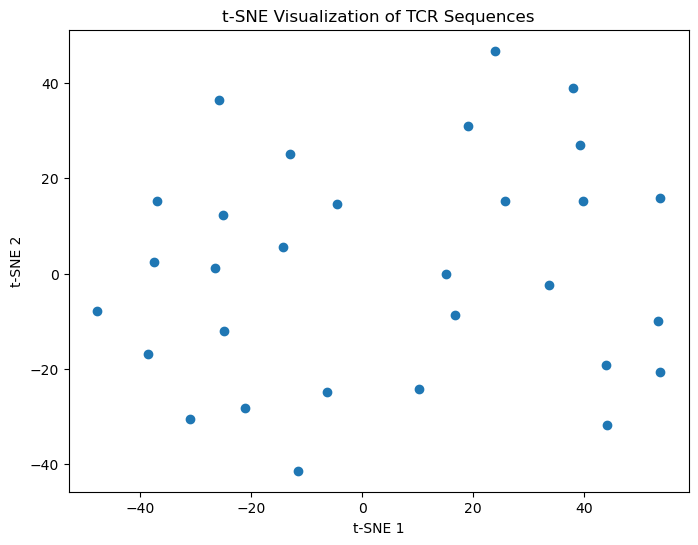

In [22]:
# Function to calculate Levenshtein distance
def levenshtein(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros((size_x, size_y))
    for x in range(size_x):
        matrix[x, 0] = x
    for y in range(size_y):
        matrix[0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix[x, y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix[x, y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1] + 1,
                    matrix[x, y-1] + 1
                )
    return (matrix[size_x - 1, size_y - 1])

# Calculate the pairwise Levenshtein distance for the subset
distance_matrix = np.zeros((len(subset), len(subset)))
for i in range(len(subset)):
    for j in range(i + 1, len(subset)):  # Only need to calculate one half of the matrix
        dist = levenshtein(subset[i], subset[j])
        distance_matrix[i, j] = dist
        distance_matrix[j, i] = dist  # The matrix is symmetric

# Apply t-SNE for dimensionality reduction with adjusted perplexity and "random" initialization
tsne_results = TSNE(n_components=2, metric="precomputed", perplexity=len(subset)/3, init='random').fit_transform(distance_matrix)



# Simple visualization of the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title('t-SNE Visualization of TCR Sequences')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


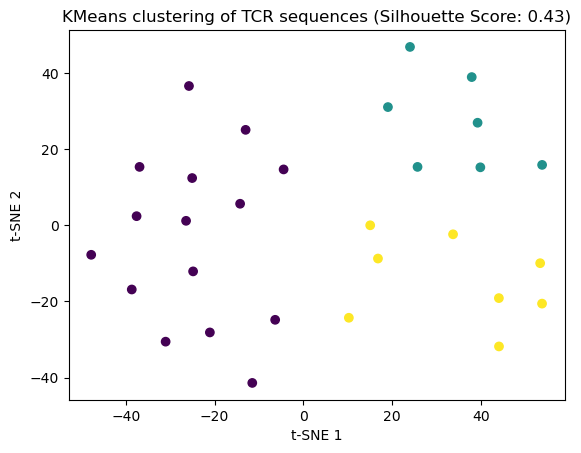

In [23]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 假设tsne_results是你的t-SNE结果

# 使用PCA进行降维
pca = PCA(n_components=2)
pca_results = pca.fit_transform(distance_matrix)

# 对t-SNE结果应用KMeans聚类
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(tsne_results)

# 计算轮廓系数来评估聚类质量
silhouette_avg = silhouette_score(tsne_results, clusters)

# 着色聚类结果
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters)
plt.title(f'KMeans clustering of TCR sequences (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

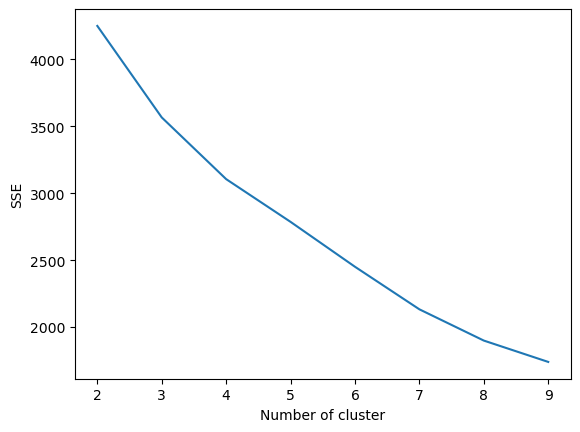

In [24]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 假设distance_matrix是你的Levenshtein距离矩阵

# 肘部方法寻找KMeans最佳群集数量
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(distance_matrix)
    sse[k] = kmeans.inertia_ # Inertia: Within-cluster sum of squares

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
# 应用DBSCAN聚类
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(distance_matrix)

# 着色聚类结果
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters)
plt.title('DBSCAN clustering of TCR sequences')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# 计算轮廓系数
print('Silhouette Score: %.2f' % silhouette_score(distance_matrix, clusters))


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 假设你有一个名为distance_matrix的距离矩阵

# 尝试不同的群集数量，计算总内方差和轮廓分数
sum_of_squared_distances = []
silhouette_scores = []
K_range = range(2, min(len(distance_matrix), 10))  # K的最大值为样本数量或10

for k in K_range:
    km = KMeans(n_clusters=k)
    km = km.fit(distance_matrix)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(distance_matrix, km.labels_))

# 绘制肘部图
plt.plot(K_range, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# 绘制轮廓分数图
plt.plot(K_range, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# 假设subset是你的原始序列数据

# 定义一个函数来将序列转换为k-mer词汇
def get_kmers(sequence, size=6):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]

# 转换为k-mer
kmer_sequences = [' '.join(get_kmers(seq)) for seq in subset]

# 应用CountVectorizer来提取特征
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(kmer_sequences)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 设labels是通过聚类或其他方式获得的目标变量
X = tsne_results
labels = kmeans.labels_
y = labels

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林分类器实例
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_classifier.fit(X_train, y_train)

# 预测测试集
y_pred = rf_classifier.predict(X_test)

# 评估模型
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# 假设X是你的数据集
# 选择一个k值，这里用4作为一个示例
k = 4

# 计算每个点的k个最近邻居的距离
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)

# 对距离进行排序，并绘制k-距离图
sorted_distances = np.sort(distances[:, k-1], axis=0)

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.xlabel("Points sorted by distance to their {}th nearest neighbor".format(k))
plt.ylabel("{}th nearest neighbor distance".format(k))
plt.title("k-Distance Graph")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_eps = None
best_min_samples = None
best_silhouette = -1

# 创建一个循环，尝试不同的eps和min_samples的值
for eps in [4, 5, 6, 7, 8, 9, 10]:
    for min_samples in [4, 5, 6, 7, 8, 9, 10, 15, 20]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)

        # 获取唯一标签的数量（排除噪声）
        n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)

        # 确保找到了至少两个聚类，并且不是所有的点都是噪声
        if n_clusters_ > 1:
            silhouette_avg = silhouette_score(X, clusters)
            print(f"eps={eps}, min_samples={min_samples}, Silhouette Score: {silhouette_avg:.2f}")
            # 更新最佳参数（如果轮廓系数更高）
            if silhouette_avg > best_silhouette:
                best_eps = eps
                best_min_samples = min_samples
                best_silhouette = silhouette_avg
        else:
            print(f"eps={eps}, min_samples={min_samples}, number of clusters: {n_clusters_}, cannot compute Silhouette Score")

# 打印最佳参数
if best_eps is not None and best_min_samples is not None:
    print(f"Best eps: {best_eps}, min_samples: {best_min_samples}, Silhouette Score: {best_silhouette}")
else:
    print("没有找到好的聚类配置")


In [ ]:


# 使用DBSCAN聚类
dbscan = DBSCAN(eps=7, min_samples=2)
dbscan.fit(X)

# 获取聚类标签
labels = dbscan.labels_


# 找出噪声点（标签为-1的点）
n_noise = list(labels).count(-1)

# 尝试计算轮廓系数来评估聚类质量（忽略噪声点）
# 注意：如果所有点都被标记为噪声，轮廓系数计算将会失败
if len(set(labels)) > 1:
    silhouette_avg = silhouette_score(X, labels)
    print(f"轮廓系数: {silhouette_avg:.2f}")
else:
    print("无法计算轮廓系数，因为没有形成有效的聚类。")

print(f"找到的聚类数量（不包括噪声）: {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"噪声点数量: {n_noise}")
